In [16]:
import pandas as pd
from scipy import signal
from scipy.signal import find_peaks
import glob
import numpy as np
import matplotlib.pyplot as plt

In [5]:


def filter_butter(separation, cutoff: float, order: int):
    """
    Butterworth digital filter, applies the filter forwards and backwards so the end result
    won't have a phase shift. Order will be multiplied by 2 (once for each pass of the filter).

    :param separation: Separation to filter
    :param cutoff: Digital filter cutoff
    :param order: Order for the single pass of the filter
    :return: filtered RFu
    """

    # Filtering Functions
    # noinspection PyTupleAssignmentBalance
    def butter_lowpass():
        nyq = 0.5 * dt
        normal_cutoff = cutoff / nyq
        b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
        return b, a

    dt = 1 / np.median(np.diff(separation.time_data))
    b, a = butter_lowpass()
    rfu_filtered = signal.filtfilt(b, a, separation.rfu, padlen=24, padtype='constant')

    return rfu_filtered


def filter_savgol(separation, window_size: int, poly_order: int):
    """
    Performs a savintsky-golay filter of the dataset, applying a gaussian window of the specified size across
    the dataset.

    :param separation:
    :param window_size: must be odd number, size of window
    :param poly_order:  Polynomial to apply for fit
    :return:
    """

    mode = 'mirror'
    return signal.savgol_filter(separation.rfu, window_size, poly_order, mode=mode)



In [3]:
# BUTTER FILTER YOUR DATA
DATA_FOLDER = r"C:\Users\Luke\Desktop\Brae\10-15-2020"
for file in glob.glob(DATA_FOLDER+"\*.csv"):
    print(file)
    df = pd.read_csv(file)
    df['rfu']=filter_butter(df, cutoff=0.8, order=2)
    file_out = file[:-4]+'_filtered.csv'
    df.to_csv(file_out, index=False)
    

C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_low_conductivity.csv
C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_low_conductivity_00000.csv
C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_low_conductivity_00001.csv
C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_low_conductivity_00002.csv
C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_low_conductivity_00003.csv
C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_low_conductivity_00004.csv
C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_low_conductivity_00005.csv
C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_low_conductivity_00006.csv
C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_low_conductivity_00007.csv
C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_low_conductivity_sfd.csv
C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_low_conductivity_sfd_00000.csv
C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_low_conductivity_sfd_00001.csv
C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_low_conductivity_sfd_00002.csv
C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_l

In [19]:
# SAVINSKY GOLAY FILTER YOUR DATA
DATA_FOLDER = r"C:\Users\Luke\Documents\Brae\9-17-2020"

for file in glob.glob(DATA_FOLDER+"\*.csv"):
    print(file)
    df = pd.read_csv(file)
    df['rfu']=filter_savgol(df, window_size=19, poly_order=2)
    file_out = file[:-4]+'_filtered.csv'
    df.to_csv(file_out, index=False)
    

C:\Users\Luke\Documents\Brae\9-17-2020\Fluorescein_00000.csv
C:\Users\Luke\Documents\Brae\9-17-2020\Fluorescein_00001.csv
C:\Users\Luke\Documents\Brae\9-17-2020\Fluorescein_00002.csv
C:\Users\Luke\Documents\Brae\9-17-2020\TEST.csv
C:\Users\Luke\Documents\Brae\9-17-2020\TEST_00000.csv
C:\Users\Luke\Documents\Brae\9-17-2020\TEST_00001.csv
C:\Users\Luke\Documents\Brae\9-17-2020\TEST_00002.csv
C:\Users\Luke\Documents\Brae\9-17-2020\TEST_00003.csv
C:\Users\Luke\Documents\Brae\9-17-2020\TEST_00004.csv
C:\Users\Luke\Documents\Brae\9-17-2020\TEST_00005.csv
C:\Users\Luke\Documents\Brae\9-17-2020\TEST_00006.csv
C:\Users\Luke\Documents\Brae\9-17-2020\TEST_00007.csv
C:\Users\Luke\Documents\Brae\9-17-2020\TEST_00008.csv
C:\Users\Luke\Documents\Brae\9-17-2020\TEST_00009.csv
C:\Users\Luke\Documents\Brae\9-17-2020\TEST_00010.csv
C:\Users\Luke\Documents\Brae\9-17-2020\TEST_00011.csv


In [4]:
# Find Peak
df

,time_data,rfu,voltage,current
0,0.000,0.002416,-0.040993,0.580308
1,0.125,0.002434,-0.040419,0.589898
2,0.250,0.002454,-0.040554,0.575666
3,0.375,0.002471,-0.040819,0.568612
4,0.500,0.002485,-0.040730,0.581711
...,...,...,...,...
588,73.500,0.002535,-0.040526,0.579692
589,73.625,0.002535,-0.041019,0.565467
590,73.750,0.002535,-0.041615,0.571156
591,73.875,0.002534,-0.040311,0.570405


In [6]:
from scipy import signal
xs = df['time_data']
data = df['rfu']
peakind = signal.find_peaks_cwt(data, np.arange(15,150))
peakind, xs[peakind], data[peakind]

(array([ 15, 298, 578], dtype=int64),
 15      1.875
 298    37.250
 578    72.250
 Name: time_data, dtype: float64,
 15     0.002517
 298    0.019244
 578    0.002537
 Name: rfu, dtype: float64)

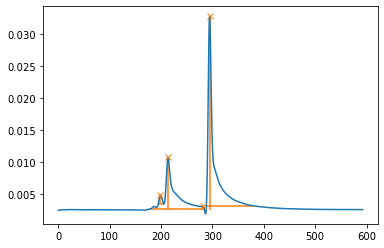

In [26]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
xs = df['time_data']
data = df['rfu']
peaks, properties = find_peaks(data, height=0.001, threshold=0.00001, width=3, rel_height=0.98)
plt.plot(data)
plt.plot(peaks, data[peaks], "x")
plt.vlines(x=peaks, ymin=data[peaks] - properties["prominences"],
           ymax = data[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
           xmax=properties["right_ips"], color = "C1")
plt.show()

In [53]:
# SAVINSKY GOLAY FILTER YOUR DATA
def get_label(name):
    if name.find('sfd')>=0:
        return 'SFD'
    else:
        return "Gravity"
    
def get_label(name):
    name = name.split('_')
    name = name[2].split('mw')
    print(name)
    return name[0]

    
def find_noise(Y, width=50, skip=5):
    noise = np.nan
    background = np.nan
    for i in range(skip,len(Y)-width-skip):
        new_noise = np.std(Y[i:i+width])
        
        if new_noise < noise or np.isnan(noise):
            noise = new_noise
            background = np.median(Y) 
    print(noise, background)
    return noise, background
    

DATA_FOLDER = r"C:\Users\Luke\Desktop\Brae\10-15-2020 borate"
data = {'label':[],'max':[], 'SNR':[], 'noise':[], "background":[], "location":[],'file':[]}
for file in glob.glob(DATA_FOLDER+"\*.csv"):
    df = pd.read_csv(file)
    df['rfu']=filter_butter(df, cutoff=2,order=2 )
    lbl = get_label(file)
    noise, background = find_noise(df['rfu'])
    peaks, properties = find_peaks(df['rfu'], height=10*noise+background)
    for pk in peaks:
        data['label'].append(lbl)
        data['max'].append(df['rfu'].values[pk]-background)
        data['SNR'].append((df['rfu'].values[pk]-background)/noise)
        data['noise'].append(noise)
        data['background'].append(background)
        data['location'].append(pk)
        data['file'].append(file)
    

['15', '.csv']
3.4533812130685976e-06 0.0027687046442306526
['15', '']
2.8525009181463164e-06 0.0028486276703514066
['15', '']
4.26719413661123e-06 0.002834376812452168
['2', '.csv']
3.910232621442275e-06 0.0016096938726349972
['2', '']
4.021085875265329e-06 0.00160843691781284
['2', '']
4.068660902946817e-06 0.0016159257342859986
['4', '.csv']
4.3908637064948485e-06 0.00183164926974365
['4', '']
3.4880143326889497e-06 0.0018389278224287594
['4', '']
3.5375325581242264e-06 0.001833432333055462
['6', '.csv']
3.126582210399401e-06 0.002008313674660194
['6', '']
4.208172216491841e-06 0.002037111513393897
['6', '']
4.043117867616534e-06 0.002041202929470878


In [54]:
df2 = pd.DataFrame(data)
df2['label']=pd.to_numeric(df2['label'])
df2['normal_snr']=df2['SNR']/max(df2['SNR'])
df2['normal_max']=df2['max']/max(df2['max'])

df2['normal_noise']=df2['noise']/max(df2['noise'])
fluor_peak = df2[df2['location'].between(300, 450, inclusive=False)]
fluor_peak = fluor_peak[fluor_peak['SNR']>1000]
fluor_peak


,label,max,SNR,noise,background,location,file,normal_snr,normal_max,normal_noise
5,15,0.005419,1569.145371,0.000003,0.002769,323,C:\Users\Luke\Desktop\Brae\10-15-2020 borate\m...,0.147871,0.179020,0.786492
15,15,0.030270,10611.615794,0.000003,0.002849,314,C:\Users\Luke\Desktop\Brae\10-15-2020 borate\m...,1.000000,1.000000,0.649645
25,15,0.024767,5803.973152,0.000004,0.002834,314,C:\Users\Luke\Desktop\Brae\10-15-2020 borate\m...,0.546945,0.818202,0.971835
31,2,0.010419,2664.445362,0.000004,0.001610,315,C:\Users\Luke\Desktop\Brae\10-15-2020 borate\m...,0.251088,0.344193,0.890538
42,2,0.010134,2520.122221,0.000004,0.001608,315,C:\Users\Luke\Desktop\Brae\10-15-2020 borate\m...,0.237487,0.334779,0.915785
49,2,0.010596,2604.214120,0.000004,0.001616,315,C:\Users\Luke\Desktop\Brae\10-15-2020 borate\m...,0.245412,0.350043,0.926620
56,4,0.018415,4193.977389,0.000004,0.001832,315,C:\Users\Luke\Desktop\Brae\10-15-2020 borate\m...,0.395225,0.608371,1.000000
67,4,0.017076,4895.607197,0.000003,0.001839,315,C:\Users\Luke\Desktop\Brae\10-15-2020 borate\m...,0.461344,0.564128,0.794380
78,4,0.017195,4860.592439,0.000004,0.001833,314,C:\Users\Luke\Desktop\Brae\10-15-2020 borate\m...,0.458045,0.568044,0.805658
88,6,0.018690,5977.664291,0.000003,0.002008,315,C:\Users\Luke\Desktop\Brae\10-15-2020 borate\m...,0.563313,0.617439,0.712065


In [41]:
# SAVINSKY GOLAY FILTER YOUR DATA
def get_label(name):
    if name.find('sfd')>=0:
        return 'SFD'
    else:
        return "Gravity"

    
def find_noise(Y, width=50, skip=5):
    noise = np.nan
    background = np.nan
    for i in range(skip,len(Y)-width-skip):
        new_noise = np.std(Y[i:i+width])
        
        if new_noise < noise or np.isnan(noise):
            noise = new_noise
            background = np.median(Y) 
    print(noise, background)
    return noise, background
    

DATA_FOLDER = r"C:\Users\Luke\Desktop\Brae\10-15-2020"
data = {'label':[],'max':[], 'SNR':[], 'noise':[], "background":[], "location":[],'file':[],"CA":[]}
for file in glob.glob(DATA_FOLDER+"\*.csv"):
    print(file)
    df = pd.read_csv(file)
    df['rfu']=filter_butter(df, cutoff=2,order=2 )
    lbl = get_label(file)
    noise, background = find_noise(df['rfu'])
    peaks, properties = find_peaks(df['rfu'], height=10*noise+background, threshold=0.00001, width=3, rel_height=0.98)
    for pk, start, stop in zip(peaks, properties['left_ips'], properties['right_ips']):
        area = np.trapz(df['rfu'].values[int(start):int(stop)]-background,df['time_data'].values[int(start):int(stop)])
        ca = area/df['time_data'].values[pk]
        data['label'].append(lbl)
        data['max'].append(df['rfu'].values[pk]-background)
        data['SNR'].append((df['rfu'].values[pk]-background)/noise)
        data['noise'].append(noise)
        data['background'].append(background)
        data['location'].append(pk)
        data['file'].append(file)
        data['CA'].append(ca)
    

C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_low_conductivity_00001.csv
3.74156453912304e-06 0.002414369467164163
C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_low_conductivity_00003.csv
3.786975002271515e-06 0.002401662486740762
C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_low_conductivity_00004.csv
3.527916670992805e-06 0.002484534230505612
C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_low_conductivity_00005.csv
4.8541131183305e-06 0.0025434224220000114
C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_low_conductivity_00006.csv
4.94475034847181e-06 0.002578588360769192
C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_low_conductivity_00007.csv
5.951207420584219e-06 0.002629268143630629
C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_low_conductivity_sfd.csv
5.421328548019131e-06 0.002540651745059399
C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_low_conductivity_sfd_00000.csv
3.3149638359519674e-06 0.0025044626450341856
C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_low_conductivity_sfd_0000

In [42]:
df2 = pd.DataFrame(data)
fluor_peak = df2[df2['location'].between(250, 350, inclusive=False)]
fluor_peak = fluor_peak[fluor_peak['SNR']>1000]
fluor_peak

,label,max,SNR,noise,background,location,file,CA
3,Gravity,0.069585,18597.938644,0.000004,0.002414,295,C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_...,0.001446
8,Gravity,0.073792,19485.771463,0.000004,0.002402,293,C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_...,0.001524
12,Gravity,0.074750,21188.054341,0.000004,0.002485,293,C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_...,0.001526
17,Gravity,0.073233,15086.718864,0.000005,0.002543,293,C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_...,0.001576
23,Gravity,0.074948,15157.096759,0.000005,0.002579,293,C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_...,0.001590
28,Gravity,0.076319,12824.111324,0.000006,0.002629,293,C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_...,0.001599
33,SFD,0.041948,7737.642373,0.000005,0.002541,293,C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_...,0.001255
37,SFD,0.043274,13054.252153,0.000003,0.002504,293,C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_...,0.001273
42,SFD,0.040504,8128.565845,0.000005,0.002578,294,C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_...,0.001248
47,SFD,0.042188,10596.830367,0.000004,0.002587,294,C:\Users\Luke\Desktop\Brae\10-15-2020\mixture_...,0.001237


In [52]:
grav = fluor_peak[fluor_peak['label']=='Gravity']
sfd = fluor_peak[fluor_peak['label']=='SFD']
g_u = grav['CA'].mean()
g_e = grav['CA'].std()
s_u = sfd['CA'].mean()
s_e = sfd['CA'].std()

g_v = 50e-12
s_v = g_v/((g_u-s_u)/s_u) 
print(f'Grav Mean: {g_u:.3e} +/- {g_e:.3e} \nSFD Mean: {s_u:.3e} +/- {s_e:.3e}')
print(f'spontaneous fluid dispacement volume: {s_v:.3e}')

s_snr = sfd['SNR'].mean()
s_noise = sfd['noise'].mean()
factor = s_snr/3
moles = s_v * 100e-9 
moles_lod = moles/factor

print(f'Mass LOD: {moles_lod:.3e}')

Grav Mean: 1.543e-03 +/- 5.738e-05 
SFD Mean: 1.256e-03 +/- 1.354e-05
spontaneous fluid dispacement volume: 2.186e-10
Mass LOD: 6.413e-21


In [49]:
s_snr/3

3407.856796071155

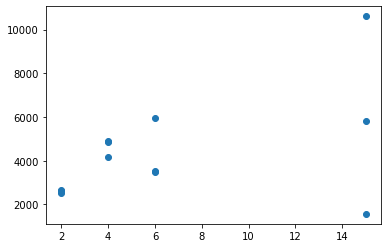

In [57]:
plt.scatter(fluor_peak['label'], fluor_peak['SNR'])

<AxesSubplot:xlabel='label', ylabel='SNR'>

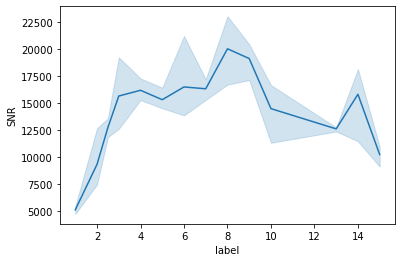

In [215]:
sns.lineplot(x='label', y='SNR', data = fluor_peak )

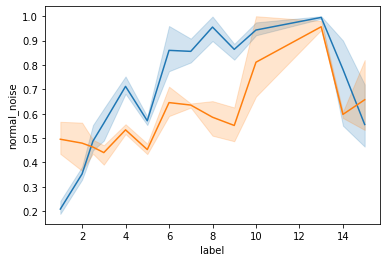

In [211]:
sns.lineplot(x='label', y='normal_max', data=fluor_peak )
sns.lineplot(x='label', y='normal_noise', data=fluor_peak)
pass

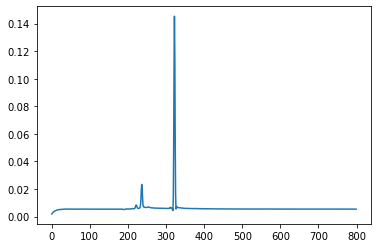

In [224]:
plt.plot(df['rfu'].values[0:800])

In [71]:
len(peaks)

4

In [114]:
df2 = pd.DataFrame(data)

In [81]:
df2.head()

,label,max,SNR,noise,background,location
0,Gravity,0.000155,26.896275,0.000006,0.000006,167
1,Gravity,0.000473,82.367854,0.000006,0.000006,187
2,Gravity,0.001886,328.210883,0.000006,0.000006,201
3,Gravity,0.005778,1005.377653,0.000006,0.000006,216
4,Gravity,0.000974,169.489183,0.000006,0.000006,283


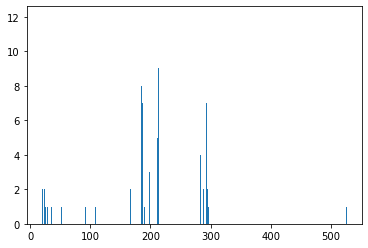

In [17]:
plt.hist(df2['location'], bins=400)
pass

In [107]:
800/8

100.0